In [1]:
import tensorflow as tf
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# !unzip /content/drive/MyDrive/earth_data/archive.zip

In [ ]:
tf.__version__

'2.8.2'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Activation, Flatten, BatchNormalization
from tensorflow.nn import local_response_normalization
import tensorflow.keras as keras

In [6]:
labels = os.listdir('/content/drive/MyDrive/earth_data/data')
print(labels)


#test_image_path = os.listdir('./dogs-vs-cats/test/')

['desert', 'cloudy', 'water', 'green_area']


In [7]:
image_path = []
label_name = []
images = []
for i in labels:
  filename = os.listdir('/content/drive/MyDrive/earth_data/data' + '/' + i)
  for j in filename:
    path = '/content/drive/MyDrive/earth_data/data' + '/' + i + '/' + j
    image_path.append(path)
    label_name.append(i)

    img = cv2.imread(path)
    img = cv2.resize(img, (227,227))
    images.append(img)

In [8]:
# images

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
len(images)

5631

In [11]:
df = pd.DataFrame({'image_path': image_path, 'labels':label_name})

In [12]:
labels_enc = df['labels'].map({'cloudy':0, 'desert':1, 'green_area':2, 'water':3}).values

In [13]:
labels_enc = np.array(labels_enc)

In [14]:
images = np.array(images)

In [15]:
# train_images = train_images.astype('float32') / 255.0

In [16]:
images.shape

(5631, 227, 227, 3)

In [17]:
X = images
y = labels_enc

In [18]:
images[0].shape

(227, 227, 3)

In [19]:
images[0].shape

(227, 227, 3)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [22]:
# y_train = np.array(y_train)
# y_val = np.array(y_val)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 227, 227, 3)
(1127, 227, 227, 3)
(4504,)
(1127,)


In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [25]:

earlystopping = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                                           verbose=1, min_lr=0.00001)

callbacks = [earlystopping, learning_rate_reduction]

In [26]:
# k = 2, n = 5, α = 10−4
# , and β = 0.75

In [27]:
model = Sequential()
model.add(Conv2D(filters=96, input_shape = (227,227,3), strides=(4,4), padding= 'valid',
                 kernel_size=(11,11), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3, strides=2, padding='valid'))

model.add(Conv2D(filters=256, kernel_size=5, padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3, strides=2, padding='valid'))

model.add(Conv2D(filters=384, kernel_size=3, padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=3, padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3, strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, callbacks=callbacks)

Epoch 1/50
36/36 [==============================] - 7s 173ms/step - loss: 9.8917 - accuracy: 0.6645 - val_loss: 1531.2994 - val_accuracy: 0.2618 - lr: 0.0010
Epoch 2/50
36/36 [==============================] - 6s 171ms/step - loss: 0.7236 - accuracy: 0.8515 - val_loss: 310.0843 - val_accuracy: 0.3602 - lr: 0.0010
Epoch 3/50
36/36 [==============================] - 6s 175ms/step - loss: 0.5260 - accuracy: 0.8557 - val_loss: 34.9271 - val_accuracy: 0.4579 - lr: 0.0010
Epoch 4/50
36/36 [==============================] - 6s 169ms/step - loss: 0.3442 - accuracy: 0.8799 - val_loss: 10.2268 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 5/50
36/36 [==============================] - 6s 165ms/step - loss: 0.3269 - accuracy: 0.8850 - val_loss: 1.5565 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 6/50
36/36 [==============================] - 6s 162ms/step - loss: 0.3637 - accuracy: 0.8663 - val_loss: 1.3289 - val_accuracy: 0.6921 - lr: 0.0010
Epoch 7/50
35/36 [============================>.] - ETA: 0s - l

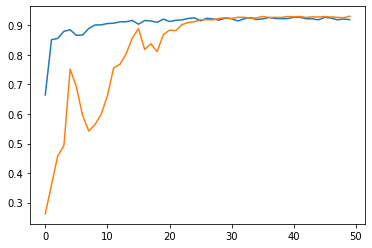

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(50)
plt.plot(epochs, acc)
plt.plot(epochs, val)

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('model2.h5')

In [ ]:
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)

In [29]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/earth_data/model.h5')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
prediction = model.predict(x_test)

In [32]:
len(prediction)

1127

In [35]:
classes = ['cloudy', 'desert', 'green_area', 'water']

In [34]:
prediction[0]

array([7.0312835e-04, 9.9929690e-01, 5.8047188e-34, 2.8011509e-25],
      dtype=float32)

In [37]:
classes[np.argmax(prediction[0])]

'desert'

In [45]:
y_test

array([1, 0, 2, ..., 0, 3, 0])

In [49]:
np.argmax(prediction[0])

1

In [53]:
from PIL import Image

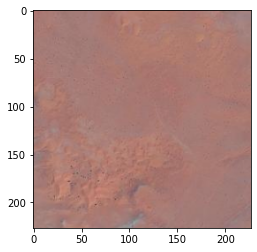

Actual:  desert
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





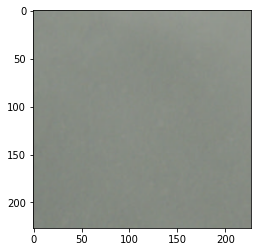

Actual:  cloudy
Predicted:  cloudy
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





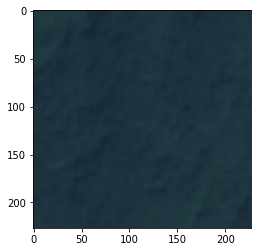

Actual:  green_area
Predicted:  green_area
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





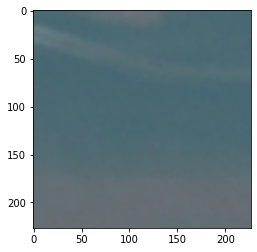

Actual:  water
Predicted:  water
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





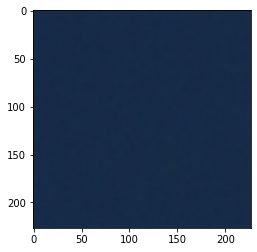

Actual:  water
Predicted:  water
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





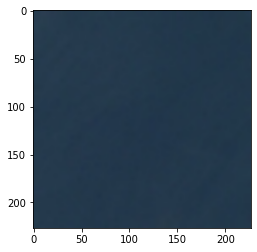

Actual:  water
Predicted:  water
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





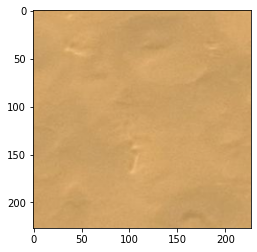

Actual:  desert
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





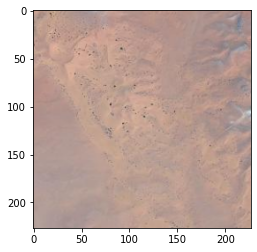

Actual:  desert
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





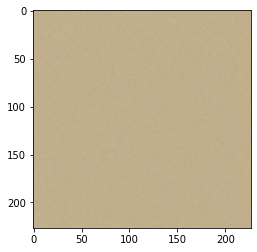

Actual:  desert
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





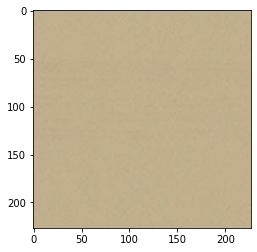

Actual:  desert
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





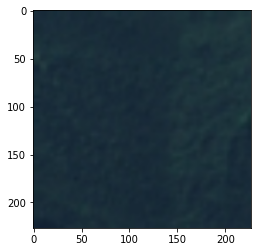

Actual:  green_area
Predicted:  green_area
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





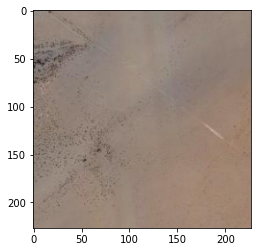

Actual:  desert
Predicted:  cloudy
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





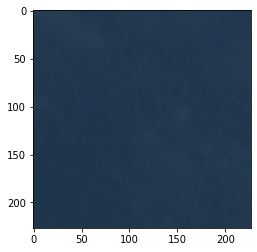

Actual:  water
Predicted:  water
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





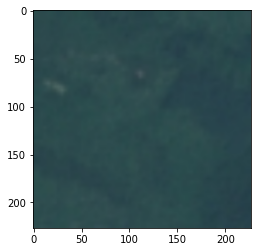

Actual:  green_area
Predicted:  green_area
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





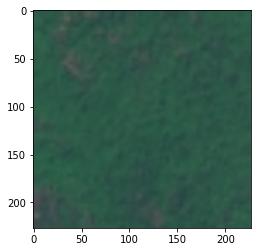

Actual:  green_area
Predicted:  green_area
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





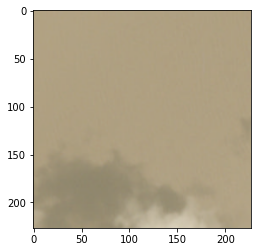

Actual:  cloudy
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





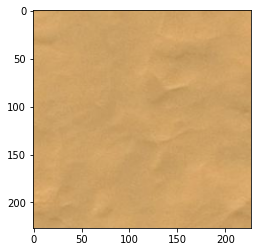

Actual:  desert
Predicted:  desert
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





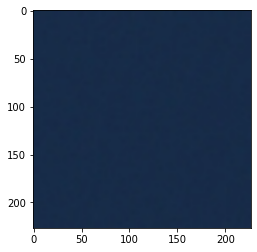

Actual:  water
Predicted:  water
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





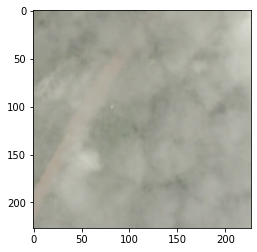

Actual:  cloudy
Predicted:  cloudy
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





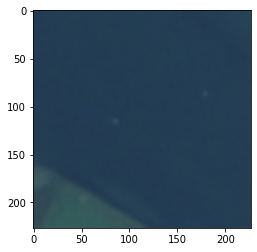

Actual:  water
Predicted:  water
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>





In [56]:
for i in range(20):
  actual = classes[y_test[i]]
  predicted = classes[np.argmax(prediction[i])]
  img = cv2.cvtColor(x_test[i], cv2.COLOR_BGR2RGB)
  im_pil = Image.fromarray(img)
  plt.imshow(im_pil)
  plt.show()
  print('Actual: ', actual)
  print('Predicted: ', predicted)
  print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
  print()
  print()
  print()